In [22]:
## pip install openpyxl
## pip install Genderize
## pip install gender-guesser-br
## pip install seaborn

In [1]:
import pandas as pd
from genderize import Genderize
from gender_guesser_br import Genero
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
media = 7

In [3]:
df = pd.read_excel('notas_alunos.xlsx')
df = df[df['Avaliação Bimestral 2024'].notnull()] #removendo quem não fez a prova

df.shape

(85, 3)

In [ ]:
df

In [4]:
def identificar_genero(nome):
    primeiro_nome = nome.split(' ')[0]

    if primeiro_nome in ['ALISON','ALISSON','ANTUANE']:
        return 'male'
    if primeiro_nome[-1]=='a' or primeiro_nome[-1]=='e':
        return 'female'
    if primeiro_nome[-1]=='o':
        return 'male'

    try:
        gender = Genderize().get(primeiro_nome) 
        return gender[0]['gender'] if gender[0]['gender'] else 'Indefinido'
    except Exception as inst:
        #print(inst)    # the exception type
        tipo = Genero(nome=primeiro_nome)
        if tipo() == 'masculino':
            return 'male'
        elif tipo() == 'feminino':
            return 'female'
        else:   
            return 'Indefinido'

In [5]:
# Vai consultar online o genero dos nomes, demora uns 40s
df['Genero'] = df['Nome'].apply(identificar_genero)


In [ ]:
df.head()

In [6]:
df.to_excel('notas_alunos_com_genero.xlsx', index=False)

In [7]:
# Calcular porcentagem de homens e mulheres no total
homens = df[df['Genero'] == 'male']
mulheres = df[df['Genero'] == 'female']
# Calcular porcentagem de homens e mulheres no total
total_homens = len(homens)
total_mulheres = len(mulheres)
total_geral = len(df)

porcentagem_homens = (total_homens / total_geral) * 100
porcentagem_mulheres = (total_mulheres / total_geral) * 100

In [8]:
print(f'Porcentagem homens {porcentagem_homens}')
print(f'Porcentagem mulheres {porcentagem_mulheres}')

Porcentagem homens 85.88235294117646
Porcentagem mulheres 14.117647058823529


In [9]:
# Calcular quantos homens e mulheres tiraram nota >= 7
homens_acima_media = len(homens[homens['Avaliação Bimestral 2024'] >= media])
mulheres_acima_media = len(mulheres[mulheres['Avaliação Bimestral 2024'] >= media])

# Calcular porcentagem de homens e mulheres com nota >= 7 dentro de seus respectivos grupos
porcentagem_homens_acima_media = (homens_acima_media / total_homens) * 100 if total_homens > 0 else 0
porcentagem_mulheres_acima_media = (mulheres_acima_media / total_mulheres) * 100 if total_mulheres > 0 else 0
print(f'Porcentagem de homens acima da média 7 {porcentagem_homens_acima_media}')
print(f'Porcentagem de mulheres acima da média 7 {porcentagem_mulheres_acima_media}')

Porcentagem de homens acima da média 7 41.0958904109589
Porcentagem de mulheres acima da média 7 41.66666666666667


In [10]:
labels = ['Homens', 'Mulheres']
sizes = [porcentagem_homens, porcentagem_mulheres]
colors = ['#3498db', '#e74c3c']

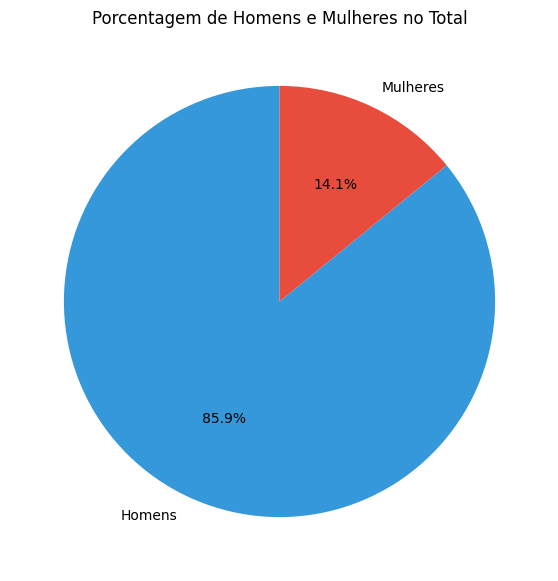

In [11]:
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Homens e Mulheres no Total')
plt.show()

In [12]:
# Gráfico de pizza para homens e mulheres com nota >= 7, ajustado pela proporção
labels_acima_media = ['Homens >= 7', 'Mulheres >= 7']
sizes_acima_media = [porcentagem_homens_acima_media, porcentagem_mulheres_acima_media]
colors_acima_media = ['#2980b9', '#c0392b']

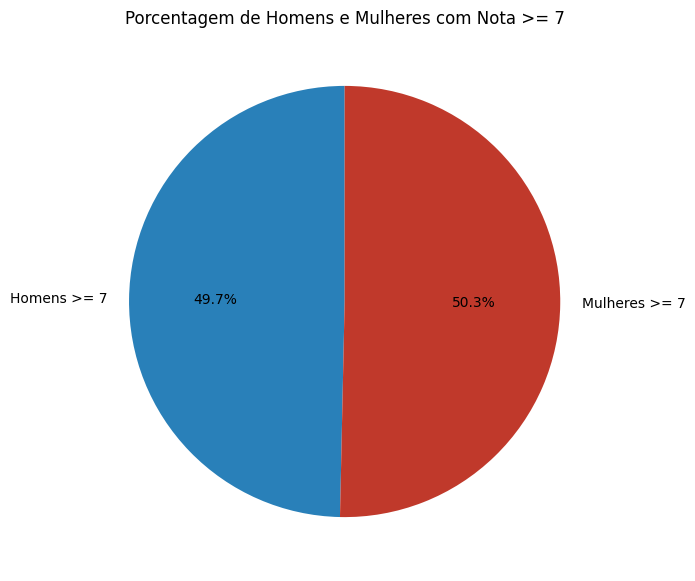

In [13]:
plt.figure(figsize=(7, 7))
plt.pie(sizes_acima_media, labels=labels_acima_media, colors=colors_acima_media, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Homens e Mulheres com Nota >= 7')
plt.show()

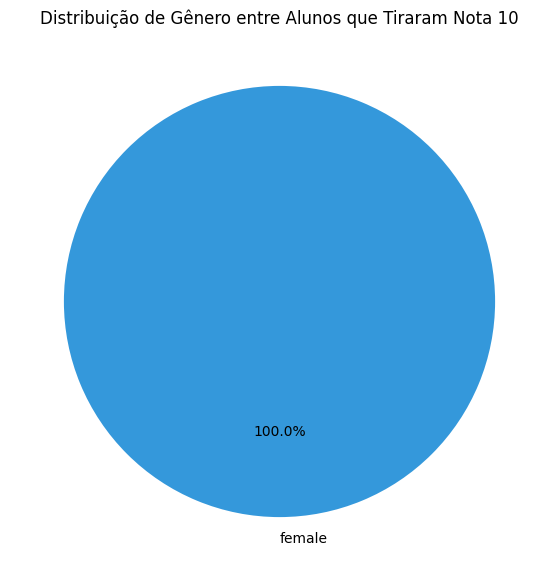

In [14]:
# Filtrar alunos que tiraram nota 10 e contar por gênero
genero_nota_10 = df[df['Avaliação Bimestral 2024'] ==10]['Genero'].value_counts(normalize=True) * 100

# Gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(genero_nota_10, labels=genero_nota_10.index, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90)
plt.title('Distribuição de Gênero entre Alunos que Tiraram Nota 10')
plt.show()

In [15]:
media_nota = df['Avaliação Bimestral 2024'].mean()
mediana_nota = df['Avaliação Bimestral 2024'].median()
moda_nota = df['Avaliação Bimestral 2024'].mode()[0]

print(f"Média: {media_nota}, Mediana: {mediana_nota}, Moda: {moda_nota}")

Média: 6.176470588235294, Mediana: 6.5, Moda: 7.0


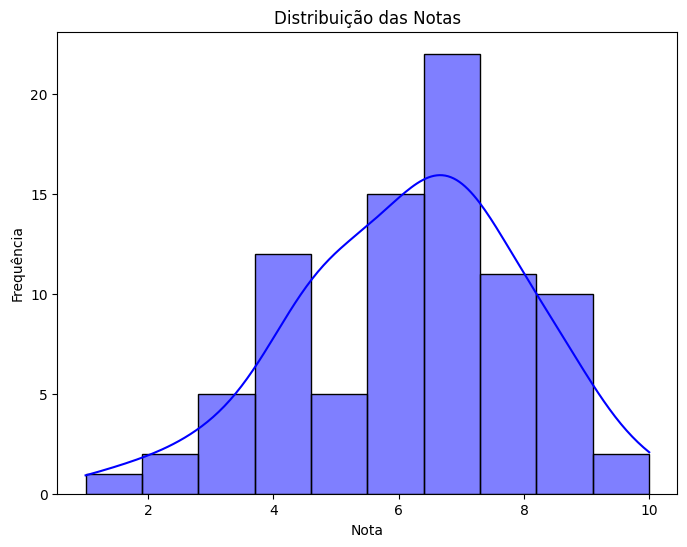

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Avaliação Bimestral 2024'], bins=10, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

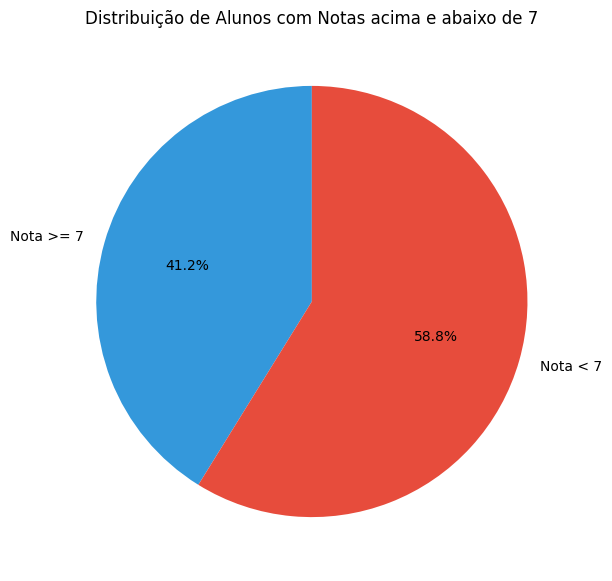

In [17]:
nota_maior_7_igual = len(df[df['Avaliação Bimestral 2024'] >= media])
nota_menor_7 = len(df[df['Avaliação Bimestral 2024'] < media])

# Dados para o gráfico
labels_nota_7 = ['Nota >= 7', 'Nota < 7']
sizes_nota_7 = [nota_maior_7_igual, nota_menor_7]
colors_nota_7 = ['#3498db', '#e74c3c']

# Gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes_nota_7, labels=labels_nota_7, colors=colors_nota_7, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Alunos com Notas acima e abaixo de 7')
plt.show()

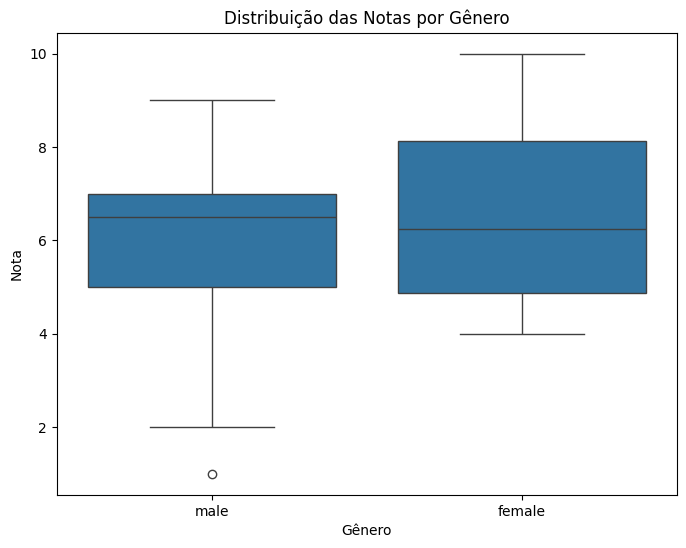

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genero', y='Avaliação Bimestral 2024', data=df)
plt.title('Distribuição das Notas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota')
plt.show()

In [19]:
#notas acima e abaixo da média
media = df['Avaliação Bimestral 2024'].mean()
acima_media = len(df[df['Avaliação Bimestral 2024'] >= media])
abaixo_media = len(df[df['Avaliação Bimestral 2024'] < media])

print(f"Alunos com nota >= média: {acima_media}")
print(f"Alunos com nota < média: {abaixo_media}")

Alunos com nota >= média: 45
Alunos com nota < média: 40


In [ ]:
# Identificando outliers usando o IQR (intervalo interquartil)
Q1 = df['Avaliação Bimestral 2024'].quantile(0.25)
Q3 = df['Avaliação Bimestral 2024'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Avaliação Bimestral 2024'] < (Q1 - 1.5 * IQR)) | (df['Avaliação Bimestral 2024'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)